## Import Librairies

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

import random
import matplotlib.pyplot as plt

## Extract data

In [2]:
import zipfile

# Specify the path to your zip file
zip_file_path = "data.zip"  # Replace with the actual path

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract all files to the current working directory
  zip_ref.extractall()
  print("Files extracted successfully!")

Files extracted successfully!


## Develop Model

In [3]:
# Charger les données 
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

# %%
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid pour classification binaire
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# %%
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


# %%
# Prédictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Évaluer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")





/Users/charlesdecommer/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 69s 187ms/step - accuracy: 0.6135 - loss: 0.6513 - val_accuracy: 0.8438 - val_loss: 0.3898
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 68s 188ms/step - accuracy: 0.8653 - loss: 0.3359 - val_accuracy: 0.9500 - val_loss: 0.1360
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 67s 183ms/step - accuracy: 0.9509 - loss: 0.1397 - val_accuracy: 0.9771 - val_loss: 0.0875
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 67s 183ms/step - accuracy: 0.9689 - loss: 0.0935 - val_accuracy: 0.9719 - val_loss: 0.0847
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 66s 180ms/step - accuracy: 0.9795 - loss: 0.0639 - val_accuracy: 0.9767 - val_loss: 0.0748
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 66s 180ms/step - accuracy: 0.9850 - loss: 0.0453 - val_accuracy: 0.9753 - val_loss: 0.0670
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 72s 197ms/step - accuracy: 0.9797 - loss: 0.0585 - val_accuracy: 0.9849 - val_loss: 0.0506
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 74s 203ms/step - accuracy: 0.9908 - loss: 0

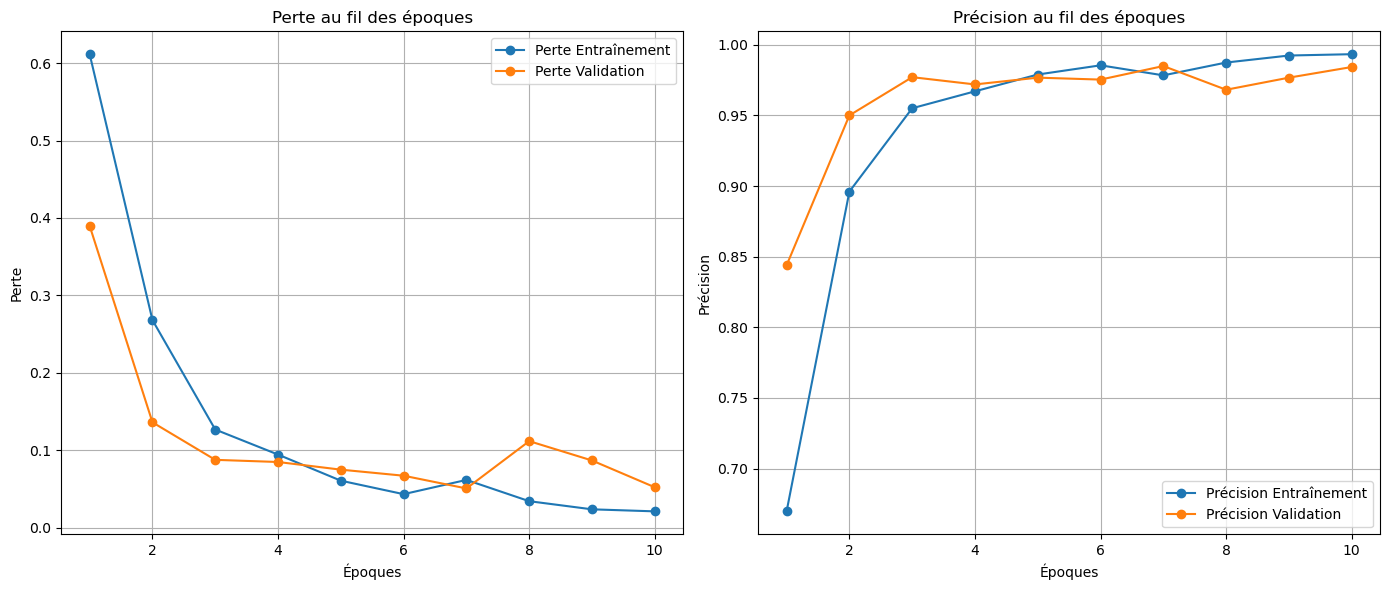

In [4]:
import matplotlib.pyplot as plt

# Extraire les données de l'historique
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Tracer la courbe de perte
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Perte Entraînement', marker='o')
plt.plot(epochs, val_loss, label='Perte Validation', marker='o')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)

# Tracer la courbe de précision
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Précision Entraînement', marker='o')
plt.plot(epochs, val_accuracy, label='Précision Validation', marker='o')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Save Model

In [5]:
# Save the entire model (architecture, weights, optimizer state, etc.)
model.save('insect_recognition_cnn_model.h5') 

## Load and Test Model

Chargment du model


Séléction de 10 photos aléatoire dans le dataset test
Prédire les classes des images sélectionnées
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


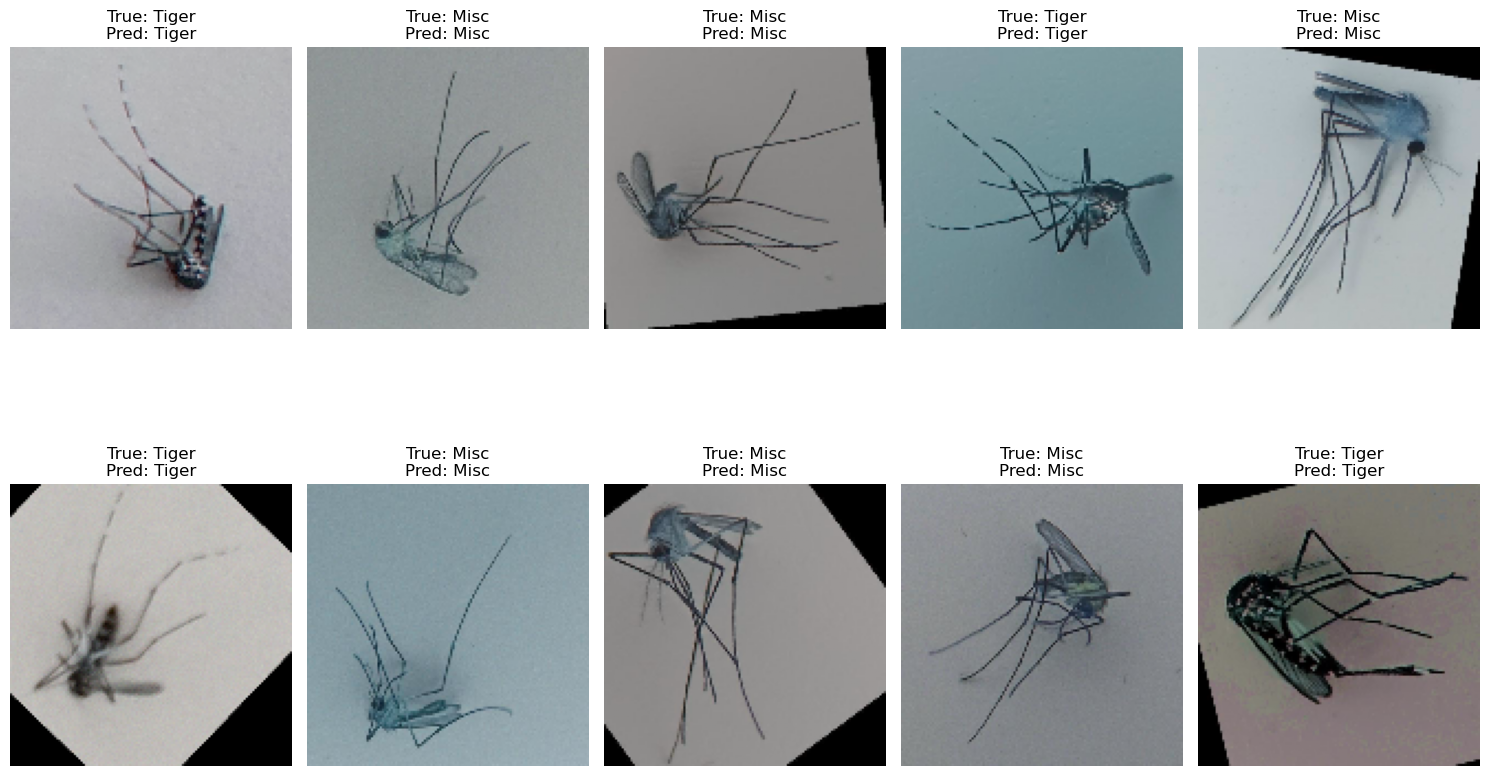

In [7]:
# Charger les données de test sauvegardées
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Charger le modèle
print("Chargment du model")
model = load_model("insect_recognition_cnn_model.h5")

# Sélectionner 10 indices aléatoires
print("Séléction de 10 photos aléatoire dans le dataset test")
random_indices = random.sample(range(X_test.shape[0]), 10)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Prédire les classes des images sélectionnées
print("Prédire les classes des images sélectionnées")
predictions = model.predict(selected_images)
predicted_labels = (predictions > 0.5).astype(int)

# Afficher les images avec leurs étiquettes vraies et prédites
plt.figure(figsize=(15, 10))
for i, img in enumerate(selected_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    true_label = "Tiger" if selected_labels[i] == 1 else "Misc"
    predicted_label = "Tiger" if predicted_labels[i] == 1 else "Misc"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Chargement du modèle...


Sélection de 10 photos aléatoires dans le dataset de test...
Prédiction des classes des images sélectionnées...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


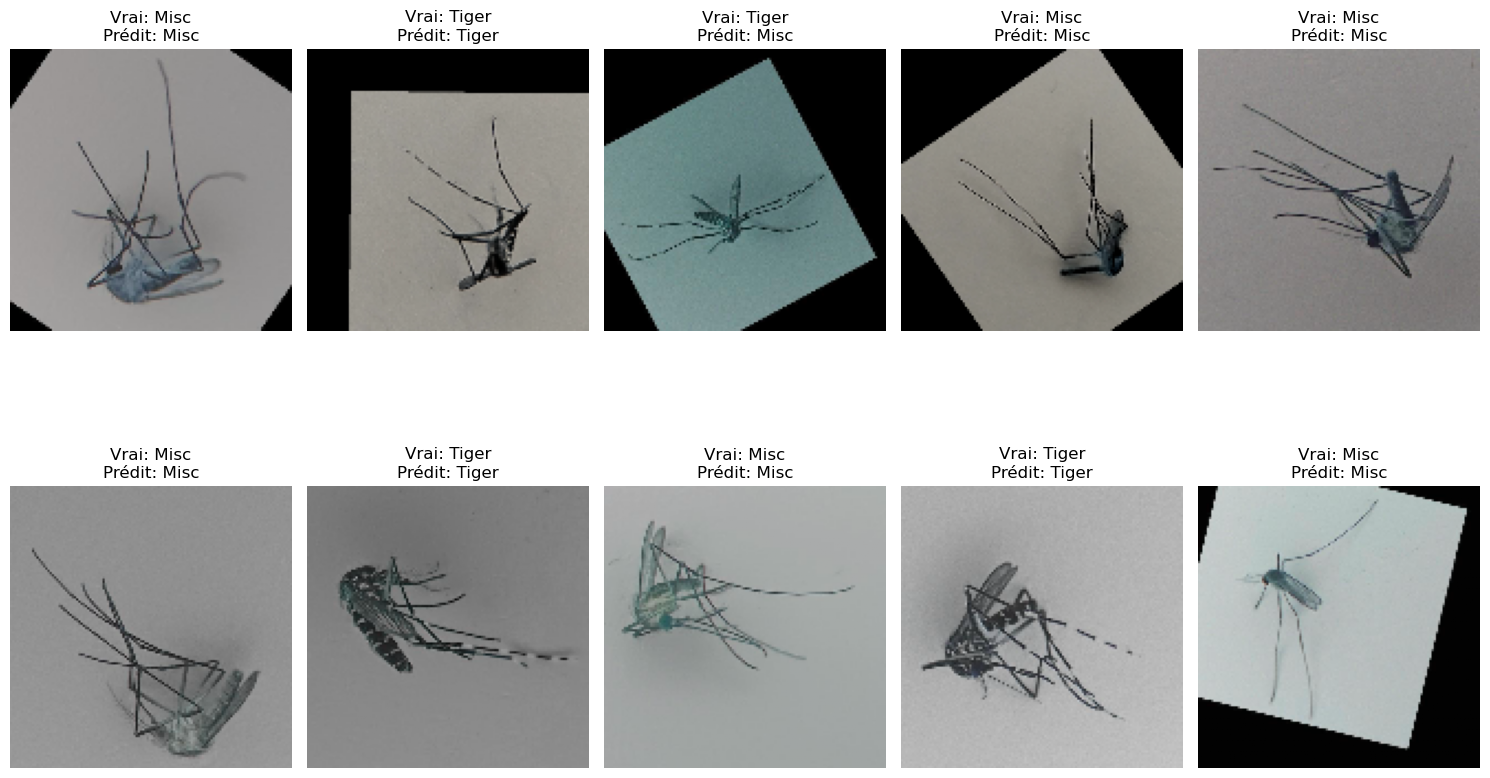

In [8]:
# Charger les données de test sauvegardées
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Charger le modèle
print("Chargement du modèle...")
model = load_model("insect_recognition_cnn_model.h5")

# Sélectionner 10 indices aléatoires
print("Sélection de 10 photos aléatoires dans le dataset de test...")
import random
random_indices = random.sample(range(X_test.shape[0]), 10)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Prédire les classes des images sélectionnées
print("Prédiction des classes des images sélectionnées...")
predictions = model.predict(selected_images)
predicted_labels = (predictions > 0.5).astype(int)

# Afficher les images avec leurs étiquettes vraies et prédites
plt.figure(figsize=(15, 10))
for i, img in enumerate(selected_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    true_label = "Tiger" if selected_labels[i] == 1 else "Misc"
    predicted_label = "Tiger" if predicted_labels[i] == 1 else "Misc"
    plt.title(f"Vrai: {true_label}\nPrédit: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
